In [1]:
# =============================================
# Home Credit Risk Prediction - Data Loading
# =============================================

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import libraries
import pandas as pd
import numpy as np

# Step 3: Set folder path
folder_path = '/content/drive/MyDrive/Tugas Final Task/'

# Step 4: Load datasets
app_train = pd.read_csv(folder_path + 'application_train.csv')
app_test = pd.read_csv(folder_path + 'application_test.csv')
bureau = pd.read_csv(folder_path + 'bureau.csv')
bureau_balance = pd.read_csv(folder_path + 'bureau_balance.csv')
previous = pd.read_csv(folder_path + 'previous_application.csv')
installments = pd.read_csv(folder_path + 'installments_payments.csv')
pos_cash = pd.read_csv(folder_path + 'POS_CASH_balance.csv')
credit_card = pd.read_csv(folder_path + 'credit_card_balance.csv')
desc = pd.read_csv(folder_path + 'HomeCredit_columns_description.csv', encoding='latin1')

# Step 5: Display shapes and preview
print("application_train shape:", app_train.shape)
print("application_test shape :", app_test.shape)
print("bureau shape           :", bureau.shape)
print("previous_application   :", previous.shape)

# Display first few rows
app_train.head()


Mounted at /content/drive
application_train shape: (307511, 122)
application_test shape : (48744, 121)
bureau shape           : (1716428, 17)
previous_application   : (1670214, 37)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Tampilkan beberapa baris deskripsi kolom
desc[['Row', 'Description']].head(15)


,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,Target variable (1 - client with payment diffi...
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


from matplotlib import pyplot as plt
_df_3['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
# Cek distribusi TARGET
app_train['TARGET'].value_counts(normalize=True) * 100


,proportion
TARGET,
0,91.927118
1,8.072882


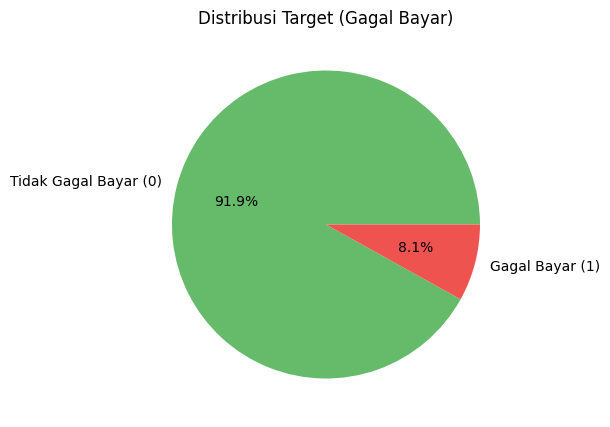

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart distribusi target
labels = ['Tidak Gagal Bayar (0)', 'Gagal Bayar (1)']
sizes = app_train['TARGET'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66bb6a','#ef5350'])
plt.title('Distribusi Target (Gagal Bayar)')
plt.show()


In [16]:
# Persentase missing values per kolom
missing = app_train.isnull().sum() / len(app_train) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(10)


,0
COMMONAREA_MEDI,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_AVG,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,68.354953


In [17]:
# Info kolom
app_train.info()

# Statistik numerik
app_train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, SK_ID_CURR to AGE_YEARS
dtypes: float64(66), int64(41), object(16)
memory usage: 288.6+ MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.936973
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.956133
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.008219
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548


In [18]:
# Korelasi numerik dengan TARGET
correlation = app_train.corr(numeric_only=True)['TARGET'].sort_values(ascending=False)
correlation.head(10)


,TARGET
TARGET,1.000000
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
FLAG_EMP_PHONE,0.045982
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_DOCUMENT_3,0.044346


In [19]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


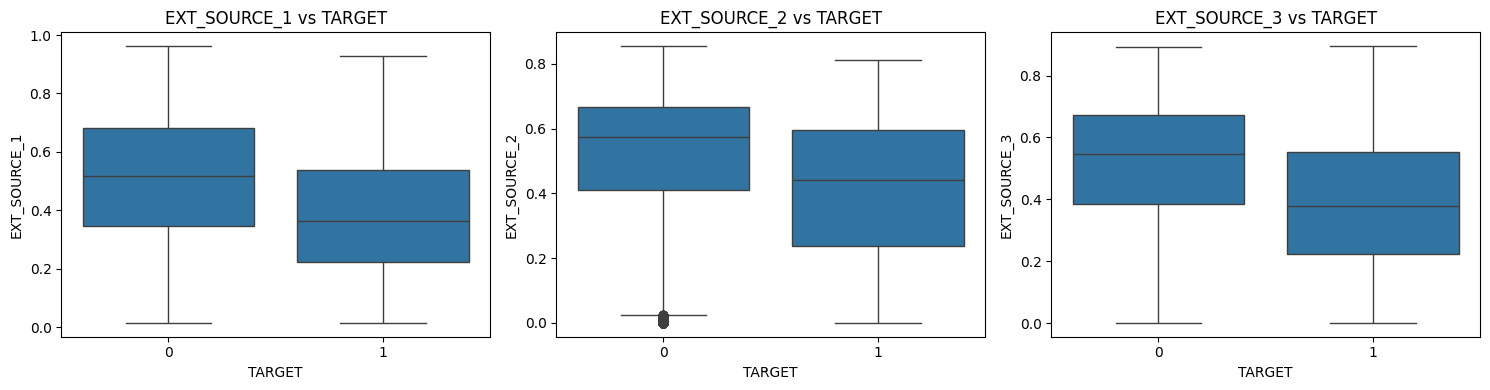

In [20]:
# Gabungkan fitur penting dan target
ext_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']
ext_df = app_train[ext_features]

# Boxplot skor eksternal terhadap target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
for i, col in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='TARGET', y=col, data=ext_df)
    plt.title(f'{col} vs TARGET')
plt.tight_layout()
plt.show()


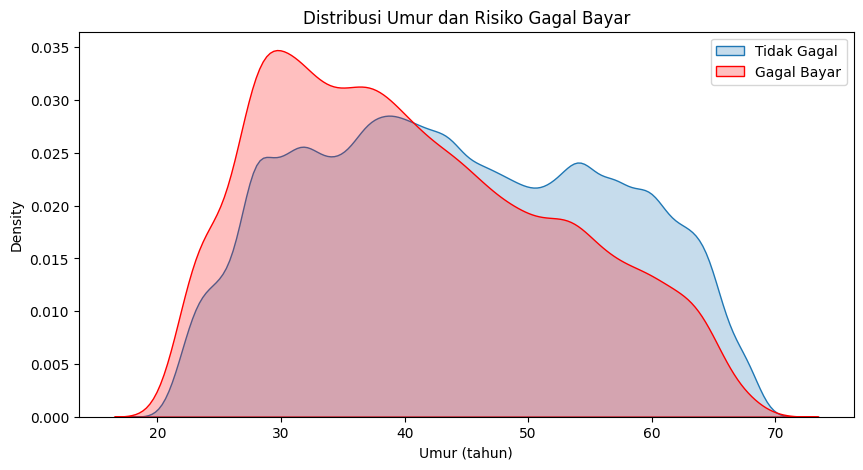

In [21]:
# Ubah jadi umur dalam tahun
app_train['AGE_YEARS'] = (-app_train['DAYS_BIRTH']) / 365

# Plot distribusi umur
plt.figure(figsize=(10,5))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AGE_YEARS'], label='Tidak Gagal', fill=True)
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AGE_YEARS'], label='Gagal Bayar', fill=True, color='red')
plt.xlabel('Umur (tahun)')
plt.title('Distribusi Umur dan Risiko Gagal Bayar')
plt.legend()
plt.show()


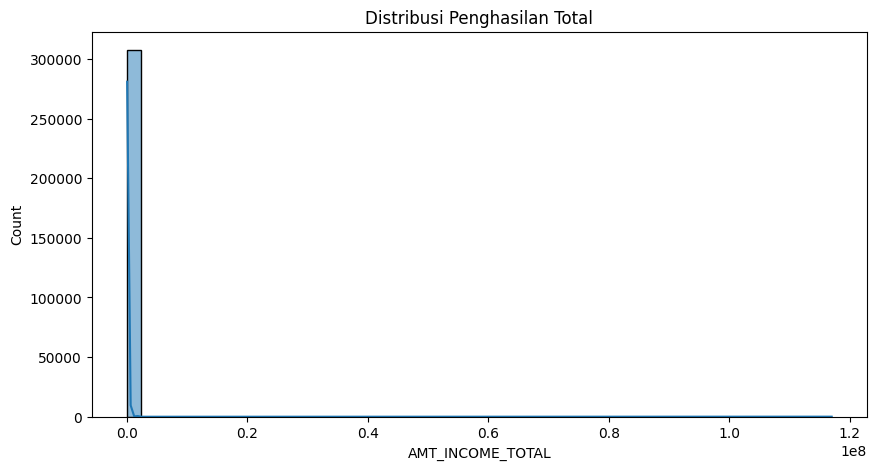

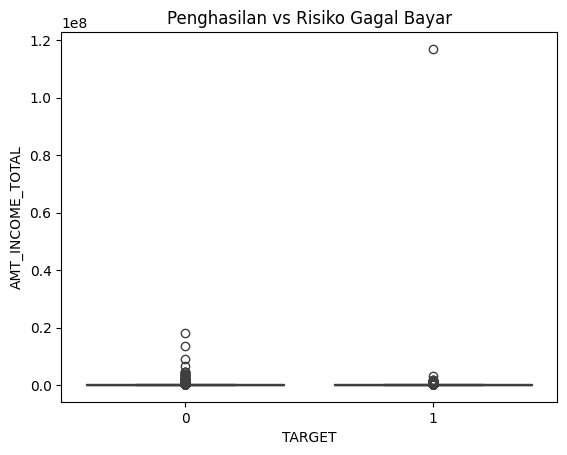

In [22]:
# Cek distribusi income
plt.figure(figsize=(10,5))
sns.histplot(app_train['AMT_INCOME_TOTAL'], bins=50, kde=True)
plt.title('Distribusi Penghasilan Total')
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

# Cek income terhadap target
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train)
plt.title('Penghasilan vs Risiko Gagal Bayar')
plt.show()


In [23]:
missing = app_train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percentage = (missing / len(app_train)) * 100
missing_percentage.head(10)


,0
COMMONAREA_MEDI,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_AVG,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,68.354953


In [25]:
# Pisahkan TARGET sebelum encoding
y = app_train['TARGET']  # Simpan y terlebih dahulu

# One-hot encoding
app_train_encoded = pd.get_dummies(app_train.drop(columns=['TARGET']))
app_test_encoded = pd.get_dummies(app_test)

# Sinkronisasi kolom antara train dan test
app_train_encoded, app_test_encoded = app_train_encoded.align(app_test_encoded, join='inner', axis=1)

# Masukkan kembali kolom TARGET untuk modeling
app_train_encoded['TARGET'] = y


In [26]:
# Pisahkan fitur dan target
X = app_train_encoded.drop(columns=['TARGET'])
y = app_train_encoded['TARGET']

# Cek bentuk
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (307511, 181)
y shape: (307511,)


In [27]:
from sklearn.model_selection import train_test_split

# Split data 80% train, 20% validasi
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_val:", X_val.shape)


X_train: (246008, 181)
X_val: (61503, 181)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Buat model
logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Latih model
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [35]:
# Prediksi probabilitas dan kelas
y_val_proba = logreg.predict_proba(X_val_scaled)[:, 1]
y_val_pred = logreg.predict(X_val_scaled)

# ROC AUC
roc_auc = roc_auc_score(y_val, y_val_proba)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix & Report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


ROC AUC Score: 0.745501035815568
Confusion Matrix:
 [[56492    46]
 [ 4913    52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.53      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.73      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503



In [36]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42, class_weight='balanced')


In [37]:
from sklearn.linear_model import LogisticRegression

# Model dengan class_weight
logreg_bal = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

# Training
logreg_bal.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [38]:
# Prediksi ulang
y_val_pred_bal = logreg_bal.predict(X_val_scaled)
y_val_proba_bal = logreg_bal.predict_proba(X_val_scaled)[:, 1]

# ROC AUC
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

roc_auc_bal = roc_auc_score(y_val, y_val_proba_bal)
print("ROC AUC Score (balanced):", roc_auc_bal)

# Confusion Matrix & Report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_bal))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_bal))


ROC AUC Score (balanced): 0.7452882655150488
Confusion Matrix:
 [[39001 17537]
 [ 1633  3332]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     56538
           1       0.16      0.67      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503



In [39]:
!pip install xgboost --quiet
from xgboost import XGBClassifier


In [40]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'  # supaya tidak warning
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [41]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Prediksi
y_val_pred_xgb = xgb.predict(X_val)
y_val_proba_xgb = xgb.predict_proba(X_val)[:, 1]

# ROC AUC Score
roc_auc_xgb = roc_auc_score(y_val, y_val_proba_xgb)
print("ROC AUC Score (XGBoost):", roc_auc_xgb)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb))

# Classification Report
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_xgb))


ROC AUC Score (XGBoost): 0.7518129275012462
Confusion Matrix:
 [[56517    21]
 [ 4927    38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.64      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.78      0.50      0.49     61503
weighted avg       0.90      0.92      0.88     61503



In [42]:
# Hitung rasio kelas untuk scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print("scale_pos_weight =", scale_pos_weight)


scale_pos_weight = 11.38710976837865


In [43]:
xgb_tuned = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=5,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'
)

xgb_tuned.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [44]:
# Prediksi ulang
y_val_pred_xgb_tuned = xgb_tuned.predict(X_val)
y_val_proba_xgb_tuned = xgb_tuned.predict_proba(X_val)[:, 1]

# Evaluasi metrik
print("ROC AUC Score (XGB Tuned):", roc_auc_score(y_val, y_val_proba_xgb_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb_tuned))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_xgb_tuned))


ROC AUC Score (XGB Tuned): 0.7536702743250295
Confusion Matrix:
 [[39477 17061]
 [ 1630  3335]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     56538
           1       0.16      0.67      0.26      4965

    accuracy                           0.70     61503
   macro avg       0.56      0.68      0.54     61503
weighted avg       0.90      0.70      0.76     61503



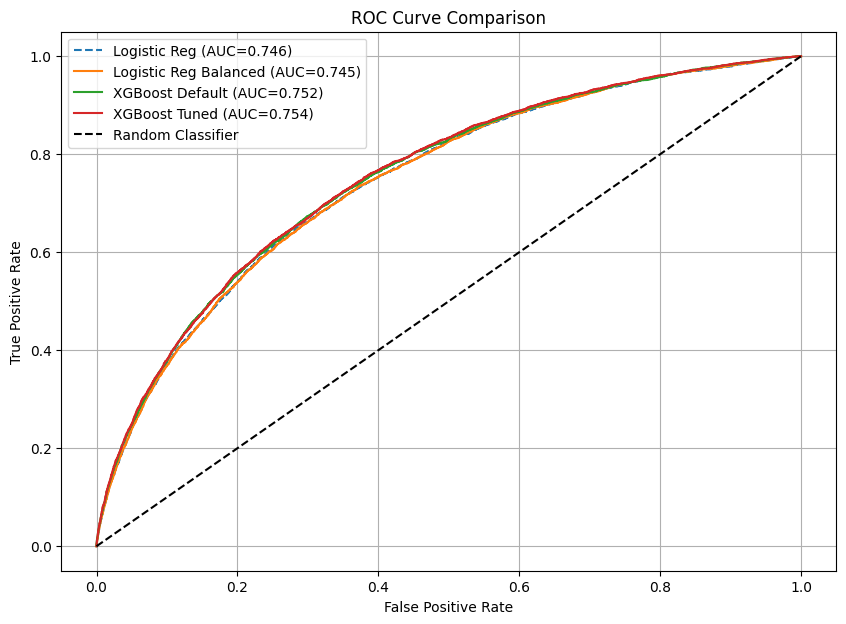

In [45]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC Curve
fpr_lr,     tpr_lr,     _ = roc_curve(y_val, y_val_proba)             # LR default
fpr_lr_bal, tpr_lr_bal, _ = roc_curve(y_val, y_val_proba_bal)         # LR balanced
fpr_xgb,    tpr_xgb,    _ = roc_curve(y_val, y_val_proba_xgb)         # XGB default
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_val, y_val_proba_xgb_tuned)  # XGB tuned

# Plot
plt.figure(figsize=(10,7))
plt.plot(fpr_lr,         tpr_lr,         label=f'Logistic Reg (AUC={roc_auc:.3f})', linestyle='--')
plt.plot(fpr_lr_bal,     tpr_lr_bal,     label=f'Logistic Reg Balanced (AUC={roc_auc_bal:.3f})')
plt.plot(fpr_xgb,        tpr_xgb,        label=f'XGBoost Default (AUC={roc_auc_xgb:.3f})')
plt.plot(fpr_xgb_tuned,  tpr_xgb_tuned,  label=f'XGBoost Tuned (AUC={roc_auc_score(y_val, y_val_proba_xgb_tuned):.3f})')

# Baseline
plt.plot([0,1],[0,1],'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


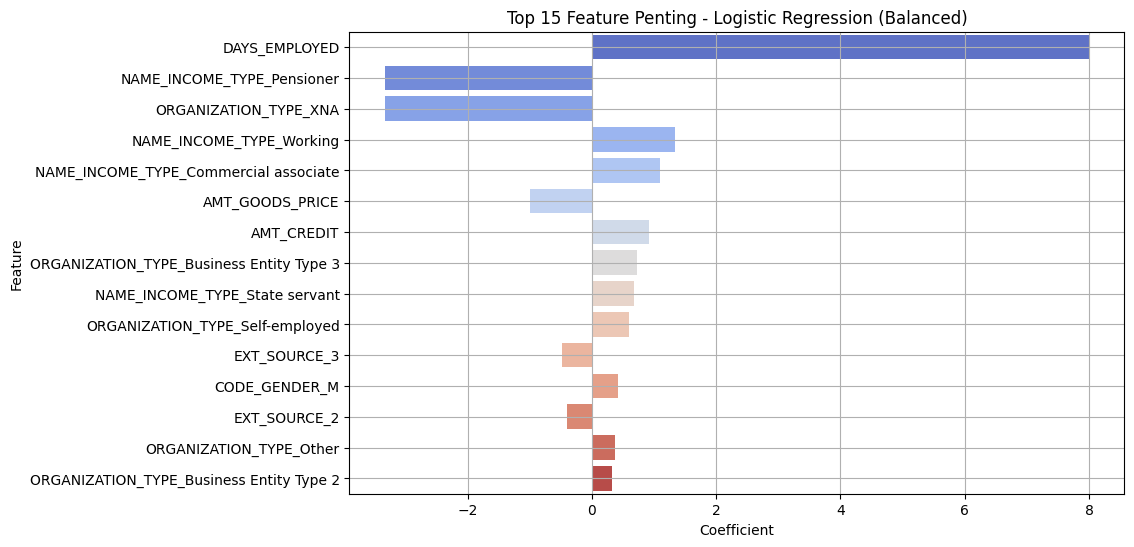

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil nama fitur dan koefisien
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_bal.coef_[0]
})

# Urutkan berdasarkan nilai absolut koefisien
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_top = coef_df.sort_values(by='abs_coef', ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_top, palette='coolwarm')
plt.title('Top 15 Feature Penting - Logistic Regression (Balanced)')
plt.grid(True)
plt.show()


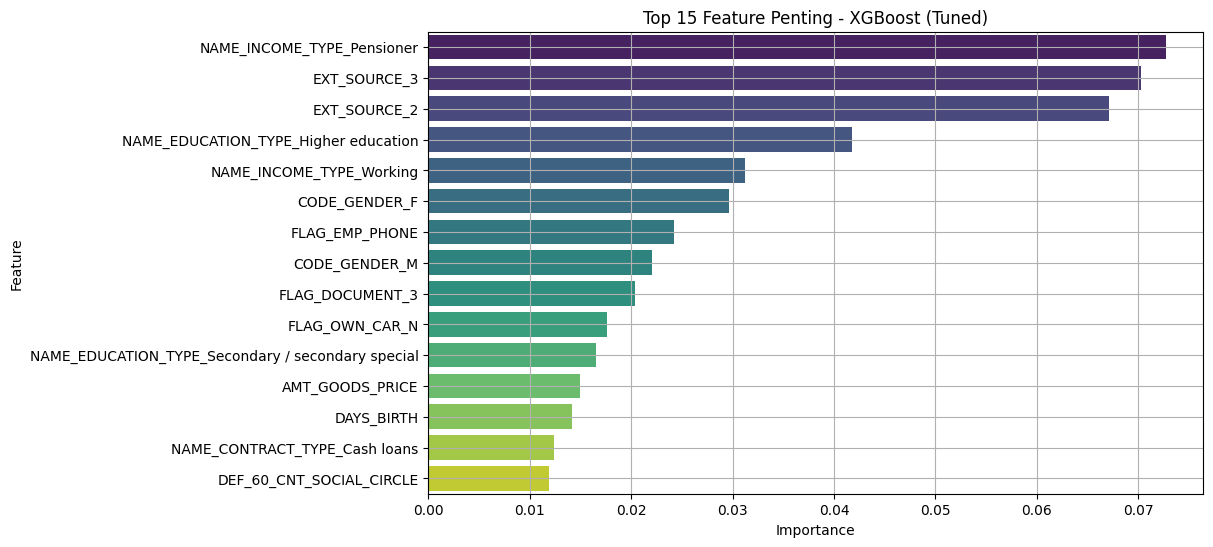

In [47]:
# Ambil importance dari model
xgb_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_tuned.feature_importances_
})

# Urutkan
xgb_top = xgb_imp.sort_values(by='Importance', ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=xgb_top, palette='viridis')
plt.title('Top 15 Feature Penting - XGBoost (Tuned)')
plt.grid(True)
plt.show()


In [48]:
# Prediksi probabilitas TARGET = 1
test_proba = xgb_tuned.predict_proba(app_test_encoded)[:, 1]

# Buat DataFrame untuk submission
submission = pd.DataFrame({
    'SK_ID_CURR': app_test['SK_ID_CURR'],
    'TARGET': test_proba
})

# Simpan ke CSV
submission.to_csv('submission_xgb_tuned.csv', index=False)

# Cek 5 baris pertama
submission.head()


,SK_ID_CURR,TARGET
0,100001,0.402022
1,100005,0.715525
2,100013,0.080711
3,100028,0.350872
4,100038,0.377870


from matplotlib import pyplot as plt
_df_6['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['SK_ID_CURR'].plot(kind='hist', bins=20, title='SK_ID_CURR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['TARGET'].plot(kind='hist', bins=20, title='TARGET')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='index', y='SK_ID_CURR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='SK_ID_CURR', y='TARGET', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['TARGET']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('TARGET')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_CURR']
  ys = series['TARGET']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('SK_ID_CURR', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_CURR')
_ = plt.ylabel('TARGET')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SK_ID_CURR']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SK_ID_CURR'}, axis=1)
              .sort_values('SK_ID_CURR', ascending=True))
  xs = counted['SK_ID_CURR']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('SK_ID_CURR', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_CURR')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_15['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['SK_ID_CURR'].plot(kind='line', figsize=(8, 4), title='SK_ID_CURR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['TARGET'].plot(kind='line', figsize=(8, 4), title='TARGET')
plt.gca().spines[['top', 'right']].set_visible(False)

In [49]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
submission.to_csv('/content/drive/MyDrive/Tugas Final Task/submission_xgb_tuned.csv', index=False)
